In [1]:
from matplotlib import pyplot as plt

import numpy as np
import cv2 as cv


In [2]:
pt1 = np.array([[37, 51], [342, 42], [485, 467], [73, 380]], dtype='float32')
pt2 = np.array([[0, 0], [511, 0], [511, 511], [0, 511]], dtype='float32')


In [3]:
img = cv.imread('./images/baboon_perspectiva.png', cv.IMREAD_GRAYSCALE)

- http://graphics.cs.cmu.edu/courses/15-463/2008_fall/Papers/proj.pdf

In [4]:
def get_perspective_transform(pointsA, pointsB):
    if pointsA.shape != (4, 2) or pointsB.shape != (4, 2):
        raise ValueError("There must be four points")

    a = np.zeros((8, 8))
    b = np.zeros((8))
    for i in range(4):
        a[i][0] = a[i+4][3] = pointsA[i][0]
        a[i][1] = a[i+4][4] = pointsA[i][1]

        a[i][2] = 1
        a[i+4][5] = 1

        a[i][6] = -pointsA[i][0]*pointsB[i][0]
        a[i+4][6] = -pointsA[i][0]*pointsB[i][1]

        a[i][7] = -pointsA[i][1]*pointsB[i][0]
        a[i+4][7] = -pointsA[i][1]*pointsB[i][1]

        b[i] = pointsB[i][0]
        b[i+4] = pointsB[i][1]

    x = np.linalg.solve(a, b)
    x.resize((9,))
    x[8] = 1
    return x.reshape((3, 3))


def warp_perspective(img, M, dsize):
    dst = np.zeros(dsize)

    iY, iX = np.indices(dimensions=img.shape)
    indexInput = np.stack(
        (iX.ravel(), iY.ravel(), np.ones(iY.size))).astype(int)

    indexOutput = M.dot(indexInput)
    indexOutput = np.round(indexOutput / indexOutput[2, :]).astype(int)

    indexOutput = indexOutput.transpose()
    index = np.where((indexOutput[:, 0] < 0) | (indexOutput[:, 0] >= dsize[0]) | (
        indexOutput[:, 1] < 0) | (indexOutput[:, 1] >= dsize[1]))

    indexOutput[index] = 0
    dst[indexOutput[:, 1], indexOutput[:, 0]] = img.ravel()

    return dst


In [5]:
M1 = cv.getPerspectiveTransform(pt1, pt2)
out1 = cv.warpPerspective(img, M1, (512,512))

In [6]:
M2 = get_perspective_transform(pt1, pt2)
out2 = warp_perspective(img, M2, (512, 512))


Text(0.5, 1.0, 'Our')

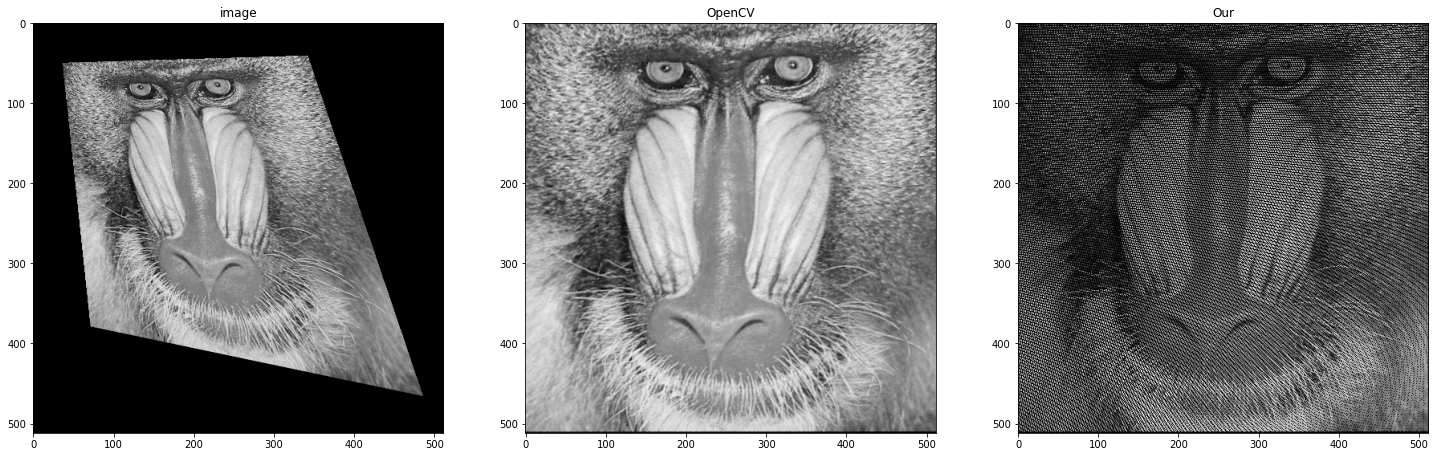

In [7]:
plt.figure(figsize=(25, 20))
rows, cols = 1, 3

# showing image
plt.subplot(rows, cols, 1)
plt.imshow(img, cmap='gray')
plt.title("image")

plt.subplot(rows, cols, 2)
plt.imshow(out1, cmap='gray')
plt.title("OpenCV")

plt.subplot(rows, cols, 3)
plt.imshow(out2, cmap='gray')
plt.title("Our")
